3. **Explain what a Kuwahara filter is, and apply it to the image using either Python or MATLAB to demonstrate its effect**





The Kuwahara filter is a non-linear smoothing filter primarily used in image processing to reduce noise while preserving edges and fine details. Introduced by the Japanese researcher K. Kuwahara, it is widely applied in image analysis. Here's a concise explanation of how the Kuwahara filter works and its applications:

**How the Kuwahara Filter Operates:**

1.	**Local Neighborhood Analysis:** The Kuwahara filter examines local neighborhoods of pixels surrounding each pixel in the image. It divides a square region around the target pixel into smaller overlapping areas, typically four.

2.	**Dividing into Regions:** The filter usually uses a 5×55 \times 55×5 window and splits it into four overlapping rectangular regions:

*	Region 1: Top-left

*	Region 2: Top-right

*	Region 3: Bottom-left

*	Region 4: Bottom-right

3.	**Computing Statistics:**

For each region, the filter calculates:

*	The mean pixel value (average color).

*	The variance of pixel values (how much pixel values vary within the region).

4.	**Selecting the Optimal Region:** The region with the lowest variance is selected because it contains less noise while still maintaining edge details. The mean value of this region is then assigned to the output pixel.

5.	**Generating the Output Image:** This process is repeated for every pixel, producing a filtered image that reduces noise but retains edges and details.

**Characteristics and Benefits:**

•	**Edge Preservation:** A significant advantage of the Kuwahara filter is its ability to maintain edges and fine details better than linear filters like the Gaussian or average filters, making it ideal for applications where edge clarity is crucial, such as in medical imaging or satellite imagery.

•	**Non-Linear Filtering:** As a non-linear filter, it effectively reduces noise without introducing significant blurring.

•	**Adaptive Nature:** The filter adapts to local image features, distinguishing between smooth areas (homogeneous regions) and areas with significant changes (edges).

**Applications:**

•	**Image Denoising:** Commonly used for reducing noise in various types of images, including photographs and remote sensing data.

•	**Medical Imaging:** It is essential in medical applications (such as MRI or CT scans) for noise reduction while maintaining critical edge details for diagnosis.

•	**Artistic Effects:** The Kuwahara filter can also be used to produce artistic effects, giving images a painterly or textured look.

**Implementation:**

In the below code, the Kuwahara filter is  applied using libraries such as OpenCV in Python. It processes each pixel according to the described method, and the filter size can be adjusted to control the balance between smoothing and edge preservation.

**Conclusion:**

The Kuwahara filter is a versatile tool in image processing, providing a balance between noise reduction and edge preservation. Its non-linear and adaptive characteristics make it suitable for various technical and artistic applications.


In [ ]:
pip install opencv-python numpy matplotlib


Original Image



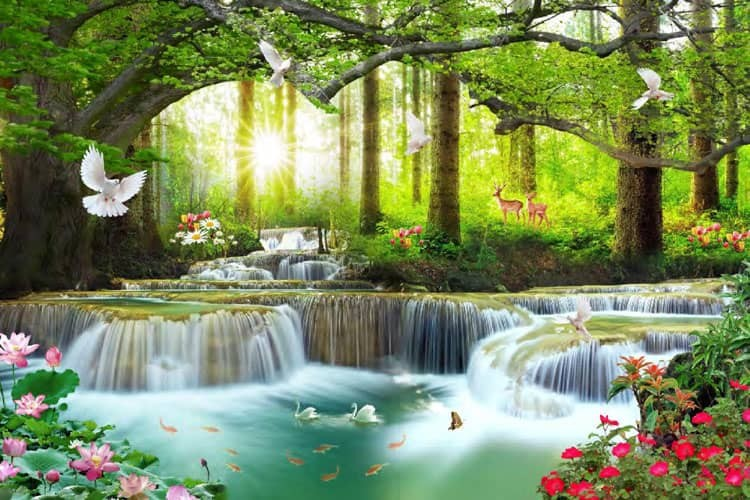


Kuwahara Filtered Image



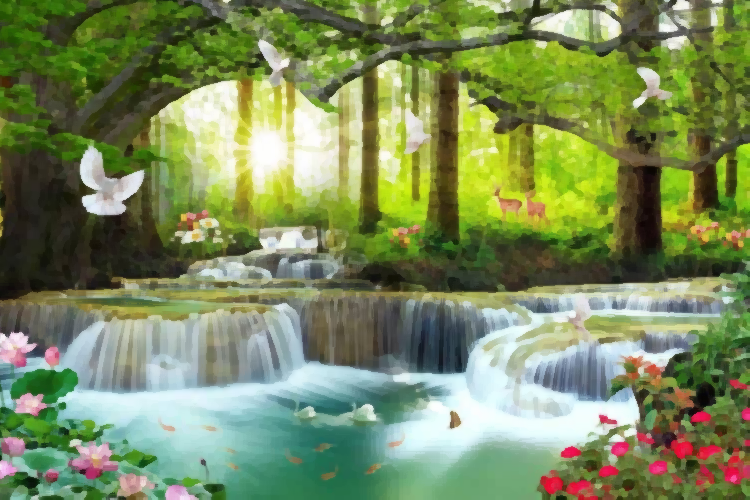

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def kuwahara_filter(image, window_size=5):
    # Get the dimensions of the image
    h, w, c = image.shape
    half_window = window_size // 2
    output_image = np.zeros_like(image)

    # Pad the image to handle borders
    padded_image = cv2.copyMakeBorder(image, half_window, half_window, half_window, half_window, cv2.BORDER_REFLECT)

    for y in range(h):
        for x in range(w):
            # Define the square regions for each channel
            region1 = padded_image[y:y + window_size, x:x + window_size]
            region2 = padded_image[y:y + window_size, x + half_window:x + window_size + half_window]
            region3 = padded_image[y + half_window:y + window_size + half_window, x:x + window_size]
            region4 = padded_image[y + half_window:y + window_size + half_window, x + half_window:x + window_size + half_window]

            # Calculate the mean and variance for each region for each channel
            means = [np.mean(region1, axis=(0, 1)), np.mean(region2, axis=(0, 1)),
                     np.mean(region3, axis=(0, 1)), np.mean(region4, axis=(0, 1))]
            variances = [np.var(region1, axis=(0, 1)), np.var(region2, axis=(0, 1)),
                         np.var(region3, axis=(0, 1)), np.var(region4, axis=(0, 1))]

            # Select the region with the minimum variance for each channel
            min_variance_index = np.argmin([np.sum(variances[i]) for i in range(4)])  # Aggregate variance across channels

            # Assign the mean value of the selected region to the output image for each channel
            output_image[y, x] = means[min_variance_index]

    return output_image.astype(np.uint8)

# Load the image
image_path = '/content/Waterfalls.jpg'  # Change the path to your image
image = cv2.imread(image_path)

# Apply the Kuwahara filter
filtered_image = kuwahara_filter(image, window_size=5)

# Display the original and filtered images
print("Original Image\n")
cv2_imshow(image)

print("\nKuwahara Filtered Image\n")
cv2_imshow(filtered_image)
